# Zilu Wang - Car Accident Severity Project

* "To my very first Data Science Project." - Zilu Wang *

## 1. Introduction/Business Problem
Car accidents happen around us everyday. According to the data reported by World Health Organization, approximately 1.35 million people die each year as a result of road traffic crashes. Road traffic crashes cost most countries 3% of their gross domestic product. The severity of road accidents may differ depending on whether there is only perperty damage, or there are people injured, seriously injured, or dead. In this project, we will be looking at a dataset published by the Seattle Transportation Department which include various features of reported car accidenta. We will look at how these features may affect the severity of road accidents and build a binary classification model to predict the severity level of road accidents given their information. It would be significantly useful for general public to be aware of what aspects may lead to road accidents so people can pay more attention to these aspects. This project can also be useful for health department such as hospitals or insurance enterprises to preparare for the accidents knowing what severity level a road accident may be. For example, if an accidents involves injury, then essential medical care equipments and professionals will be needed; if not, it prevents the waste of unnecessary social resource so other people in need will receive proper assistance. 

## 2. Data Collection
The data we will be using for this project is the dataset from SDOT Traffic Management Division, Traffic Records Group.  This dataset contains all collisions provided by SPD and recorded by Traffic Records including features relative to car accidents such as the location, collision type, number of people involved in the accidents, weather condition, road condition, light condition, whether the driver was under influence or speeding etc. The target feature we want to predict is the severity level of an accidents, level 1 being there is only property damage but no injury; level 2 being there is injury involved in the accident. For more detailed description of each variable, check out the link down below: https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Metadata.pdf

## 3. Data Understanding

### Set up Environment and Load Data

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
import descartes
from shapely.geometry import Point, Polygon
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('Data-Collisions.csv')

### Overview of dataset

First we will take a look at the first 5 rows of the dataframe. 

In [2]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [3]:
print('The Dimension of this dataset is: ' + str(df.shape))

The Dimension of this dataset is: (194673, 38)


Then we will look at what variables this dataset contains and their datatypes and statistic descriptions. 

In [4]:
df.columns.values

array(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY',
       'REPORTNO', 'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION',
       'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC',
       'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT',
       'VEHCOUNT', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE',
       'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER',
       'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING',
       'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY',
       'HITPARKEDCAR'], dtype=object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

In [6]:
df.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


In [7]:
df.describe(include=['O'])

,REPORTNO,STATUS,ADDRTYPE,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYDESC,COLLISIONTYPE,INCDATE,INCDTTM,...,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,ST_COLDESC,HITPARKEDCAR
count,194673,194673,192747,191996,84811,5638,194673,189769,194673,194673,...,29805,189789,189592,189661,189503,4667,9333,194655,189769,194673
unique,194670,2,3,24102,2,1,2,10,5985,162058,...,1,4,11,9,9,1,1,115,62,2
top,1780512,Matched,Block,BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB ...,,"Not Enough Information, or Insufficient Locati...",Property Damage Only Collision,Parked Car,2006/11/02 00:00:00+00,11/2/2006,...,Y,N,Clear,Dry,Daylight,Y,Y,32,One parked--one moving,N
freq,2,189786,126926,276,79173,5638,136485,47987,96,96,...,29805,100274,111135,124510,116137,4667,9333,27612,44421,187457


### Missing Values

At this stage, we will only look at the number of missing values and their percentage in its column and we will deal with them later. 

In [8]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PEDROWNOTGRNT,190006,0.976026
EXCEPTRSNDESC,189035,0.971039
SPEEDING,185340,0.952058
INATTENTIONIND,164868,0.846897
INTKEY,129603,0.665747
EXCEPTRSNCODE,109862,0.564341
SDOTCOLNUM,79737,0.409595
JUNCTIONTYPE,6329,0.032511
Y,5334,0.027400
X,5334,0.027400


It looks like variables PEDROWNOTGRNT, EXCEPTRSNDESC, SPEEDING, INATTENTIONIND, INTKEY, EXCEPTRSNCODE, SDOTCOLNUM all have over 40% missing values. Since EXCEPTRSNDESC, INTKEY, EXCEPTRSNCODE, SDOTCOLNUM does not contain much useful informtion therefore we will drop these columns. Then we will take a closer look at variables INATTENTIONIND, UNDERINFL, SPEEDING, PEDROWNOTGRNT later since they do contain useful information about the accident. 

### Data Preprocessing for Visualization

There are some variables that require data preprocessing before we move on to the exploratory data analysis. 

In [9]:
print(df['INATTENTIONIND'].value_counts())
print(df['UNDERINFL'].value_counts())
print(df['SPEEDING'].value_counts())
print(df['PEDROWNOTGRNT'].value_counts())
print(df['HITPARKEDCAR'].value_counts())

Y    29805
Name: INATTENTIONIND, dtype: int64
N    100274
0     80394
Y      5126
1      3995
Name: UNDERINFL, dtype: int64
Y    9333
Name: SPEEDING, dtype: int64
Y    4667
Name: PEDROWNOTGRNT, dtype: int64
N    187457
Y      7216
Name: HITPARKEDCAR, dtype: int64


In the dataset, these 3 columns INATTENTIONIND, SPEEDING, PEDROWNOTGRNT only contain value 'Y'. Therefore NaN indicates that this situation does not apply or the value is truely missing. 

For columns INATTENTIONIND, SPEEDING, AND PEDROWNOTGRNT, I will replace value 'Y' with integer 1, and fill in NaN values with integer 0; 

For column UNDERINFL, it has 4 values: 'Y', 'N', 1, and 0. I will replace 'Y' and 'N' with integer 1 and 0 respectively; 

We will do the same for column HITPARKEDCAR as well. 


It is possible that these columns may contain actual NaN values, therefore simply replacing NaN with value 0 may affect the accuracy of our prediction models. For now we will keep these variables, but later during data engineering stage we will try to drop these columns and see if we can get a better performance score. 

To avoid overwriting the original dataset, we will make a copy of the original dataframe and store it in object named all_data. 

In [10]:
all_data = df.copy()
all_data.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [11]:
all_data['INATTENTIONIND'].replace(np.nan, 0, inplace = True)
all_data['INATTENTIONIND'].replace('Y', 1, inplace = True)
all_data['UNDERINFL'].replace('N', 0, inplace = True)
all_data['UNDERINFL'].replace(np.nan, 0, inplace = True)
all_data['UNDERINFL'].replace('Y', 1, inplace = True)
all_data["UNDERINFL"] = all_data["UNDERINFL"].astype(str).astype(int)
all_data['PEDROWNOTGRNT'].replace(np.nan, 0, inplace = True)
all_data['PEDROWNOTGRNT'].replace('Y', 1, inplace = True)
all_data['SPEEDING'].replace(np.nan, 0, inplace = True)
all_data['SPEEDING'].replace('Y', 1, inplace = True)
all_data['HITPARKEDCAR'].replace('Y', 1, inplace = True)
all_data['HITPARKEDCAR'].replace('N', 0, inplace = True)

In [12]:
print(all_data['INATTENTIONIND'].value_counts())
print(all_data['UNDERINFL'].value_counts())
print(all_data['SPEEDING'].value_counts())
print(all_data['PEDROWNOTGRNT'].value_counts())
print(all_data['HITPARKEDCAR'].value_counts())

0    164868
1     29805
Name: INATTENTIONIND, dtype: int64
0    185552
1      9121
Name: UNDERINFL, dtype: int64
0    185340
1      9333
Name: SPEEDING, dtype: int64
0    190006
1      4667
Name: PEDROWNOTGRNT, dtype: int64
0    187457
1      7216
Name: HITPARKEDCAR, dtype: int64


Now we have cleaned the data, the dataset is ready for exploratory data analysis!

## 4. Exploratory Data Analysis (EDA)


Here we will first look at the numerical variables and their distribution. 

### Accident Severity Level

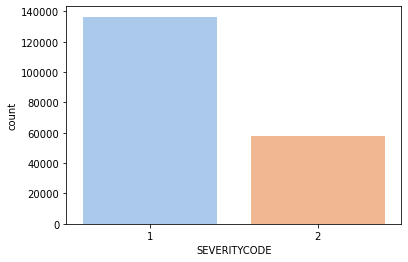

In [13]:
sns.countplot(all_data['SEVERITYCODE'], palette = 'pastel')
plt.show()

At a first glance, we can see the majority entries in this dataset is Level 1, around 70% of the data is assigned to the level 1 group, that is something that we should keep in mind when we do data pre-processing before feeding into machine learning models since the data is not balanced. 

### Distribution of Pedestrian, Bicycles, Vehicle and Person Count

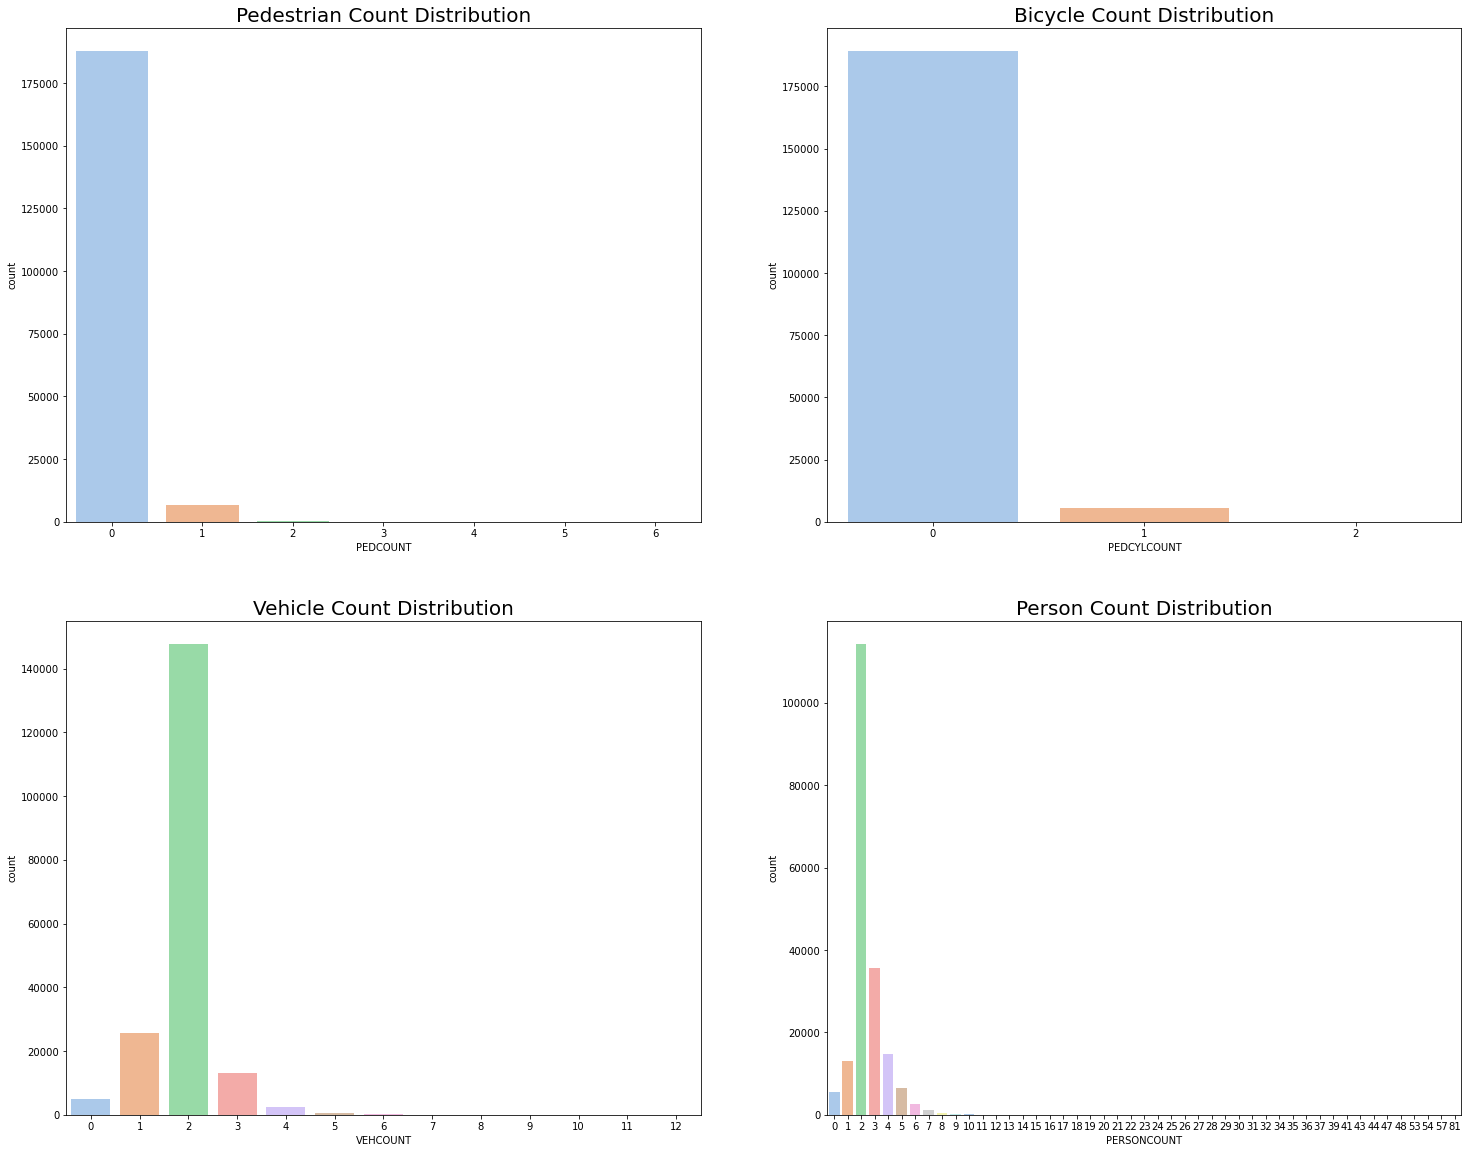

In [14]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (25, 20))
sns.countplot(all_data['PEDCOUNT'], ax = ax1, palette = 'pastel')
ax1.set_title('Pedestrian Count Distribution', size = 20)
sns.countplot(all_data['PEDCYLCOUNT'], ax = ax2, palette = 'pastel')
ax2.set_title('Bicycle Count Distribution', size = 20)
sns.countplot(all_data['VEHCOUNT'], ax = ax3, palette = 'pastel')
ax3.set_title('Vehicle Count Distribution', size = 20)
sns.countplot(all_data['PERSONCOUNT'], ax = ax4, palette = 'pastel')
ax4.set_title('Person Count Distribution', size = 20)
plt.show()

In this section, we can see from the distribution of data that in most cases, the number of pedestrians and bicycles are 0. There are no cases where the number of bicycles involved in an accident is more than 2. 

The distribution of vehicle count and person count is right skewed. Most car accidents involve 2 vehicles, which makes sense; the number of people involved in a single accident can go up to 81 people, but the majority cases involve 2 people. 

Next, we will go ahead and take a look at the categorial variables. 

### Distribution of Accidents Count for Weather Type, Light Condition, Road Condition, Collision Type, Junction Type and Address Type

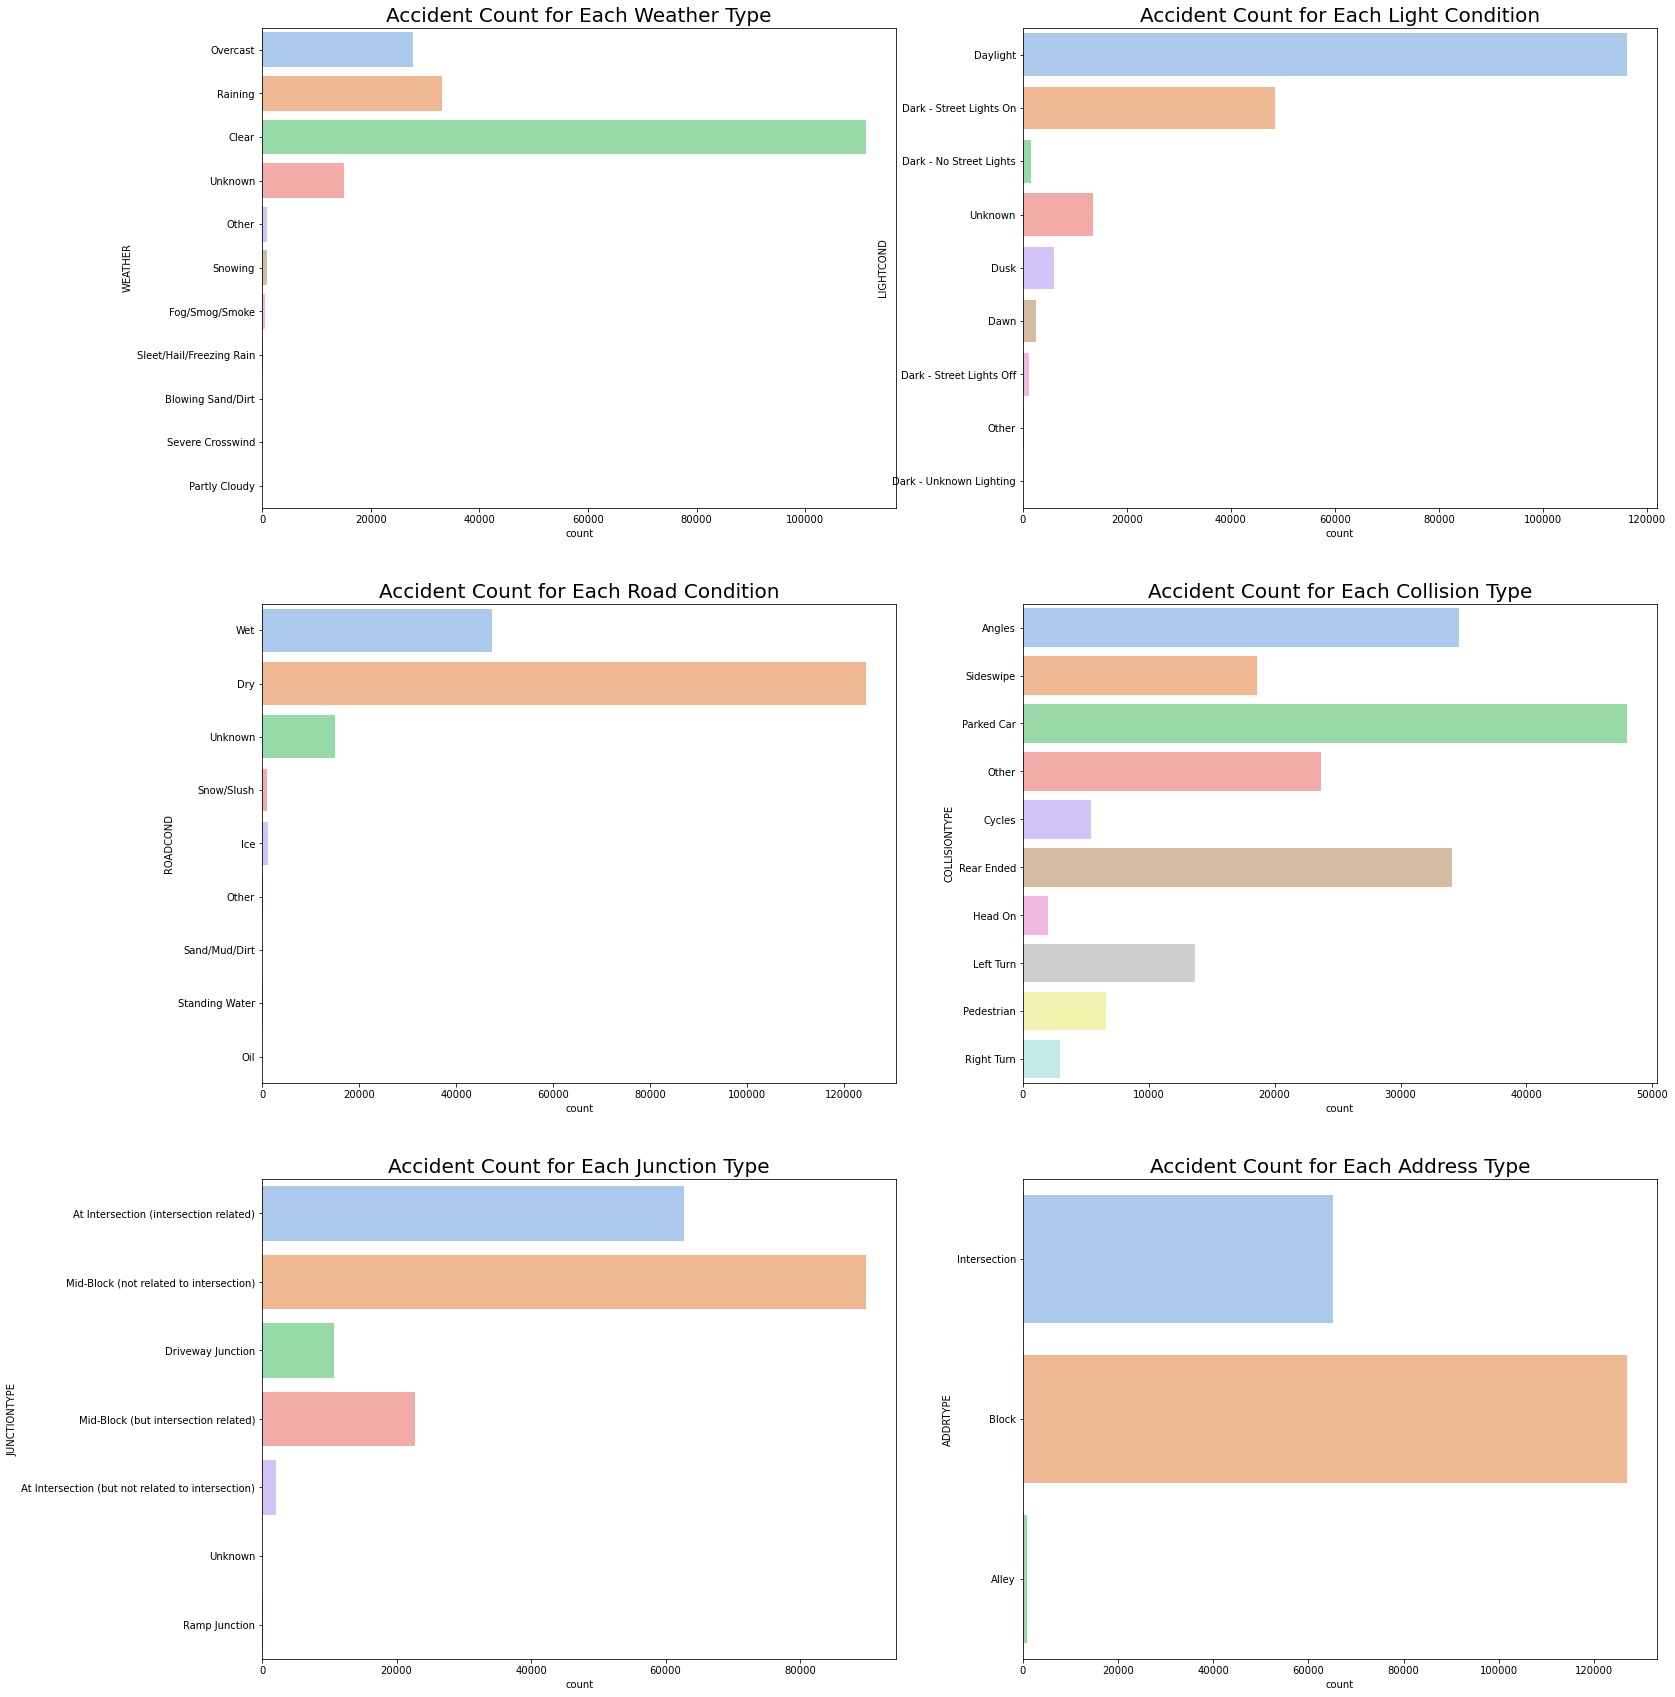

In [15]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows = 3, ncols = 2, figsize = (25, 30))
sns.countplot(y = all_data['WEATHER'], ax = ax1, palette = 'pastel')
ax1.set_title('Accident Count for Each Weather Type', size = 20)
sns.countplot(y = all_data['LIGHTCOND'], ax = ax2, palette = 'pastel')
ax2.set_title('Accident Count for Each Light Condition', size = 20)
sns.countplot(y = all_data['ROADCOND'], ax = ax3, palette = 'pastel')
ax3.set_title('Accident Count for Each Road Condition', size = 20)
sns.countplot(y = all_data['COLLISIONTYPE'], ax = ax4, palette = 'pastel')
ax4.set_title('Accident Count for Each Collision Type', size = 20)
sns.countplot(y = all_data['JUNCTIONTYPE'], ax = ax5, palette = 'pastel')
ax5.set_title('Accident Count for Each Junction Type', size = 20)
sns.countplot(y = all_data['ADDRTYPE'], ax = ax6, palette = 'pastel')
ax6.set_title('Accident Count for Each Address Type', size = 20)
plt.show()

Here we are looking at the value counts for different categorical variables in this dataset. From these plots we are able to see that most car accidents happen during daytime under normal weather and road conditions. Among all types of collisions, hitting a parked car, rear-end collision, and angle collisions are the most common types of collision. As far as the location of car accidents, most car accidents happen at mid block and intersections. 

### Weather Type VS Severity level

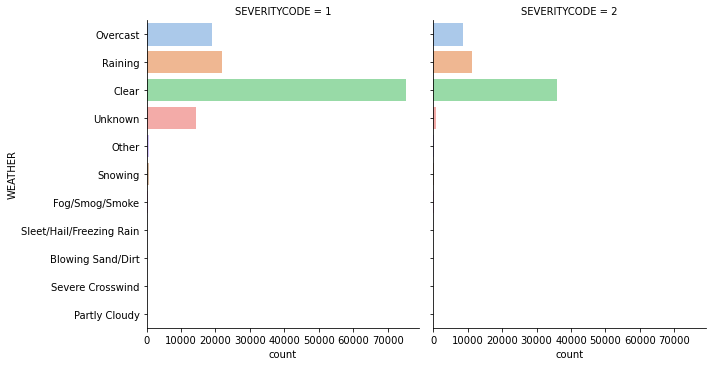

In [16]:
sns.catplot(y="WEATHER", col="SEVERITYCODE",
                data=all_data, kind="count", palette = 'pastel')

Here we don't really see anything too exiting, except for the fact that if accidents happen under 'unkown' weather, it is more likely to be level 1 accident. 

### Collision Type VS Severity Level

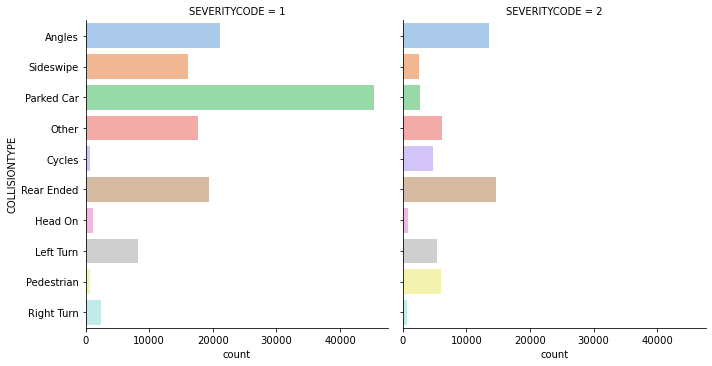

In [17]:
sns.catplot(y="COLLISIONTYPE", col="SEVERITYCODE",
                data=all_data, kind="count", palette = 'pastel')

In this part, we can see that if an accident involves sideswipe and parked car, it is very likely to be level 1 accidents. If an accident involves cycles and pedestrians, it is more likely to be level 2 accident. 

### Road Condition VS Severity Level

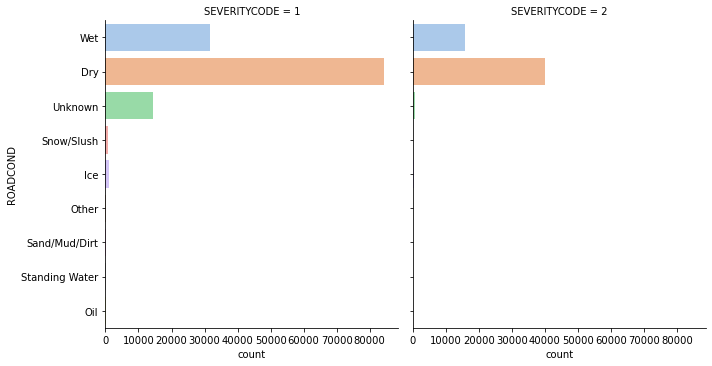

In [18]:
sns.catplot(y="ROADCOND", col="SEVERITYCODE",
                data=all_data, kind="count", palette = 'pastel')

### Light Condition VS Severity Code

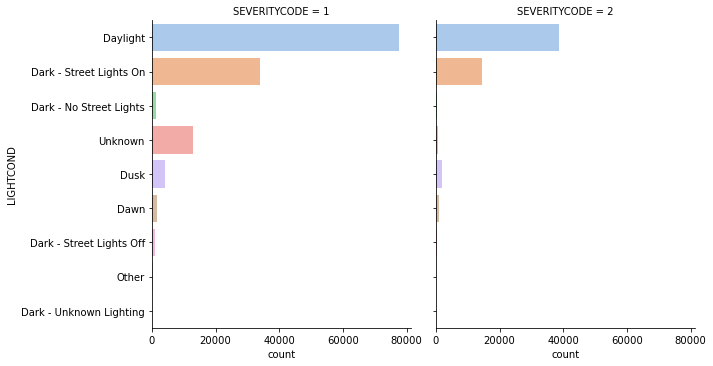

In [19]:
sns.catplot(y="LIGHTCOND", col="SEVERITYCODE",
                data=all_data, kind="count", palette = 'pastel')

### Junction Type VS Severity Code

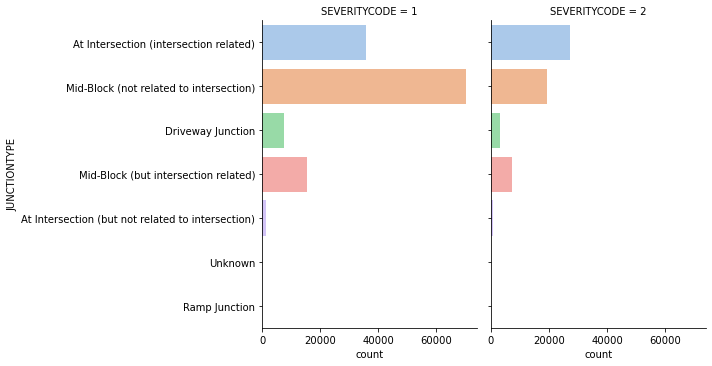

In [20]:
sns.catplot(y="JUNCTIONTYPE", col="SEVERITYCODE",
                data=all_data, kind="count", palette = 'pastel')

Here we notice that for level 1 accidents, the most common location where accidents happen is mid-block; for level 2 accidents, it is at intersection in terms of junction type. 

### Address Type VS Severity Code

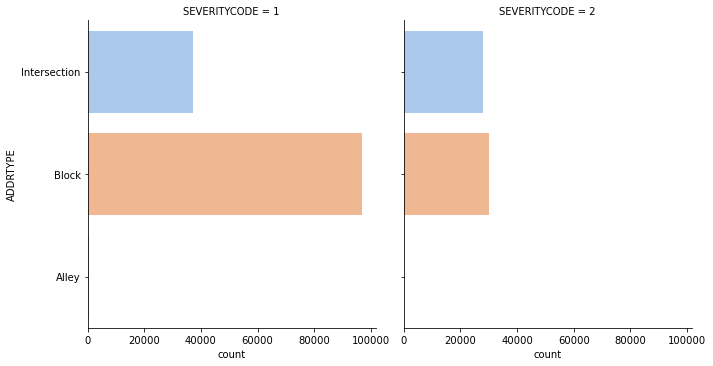

In [21]:
sns.catplot(y="ADDRTYPE", col="SEVERITYCODE",
                data=all_data, kind="count", palette = 'pastel')

The two plots above show that if an accident happens at mid-block, it's more likely to be level 1 accident. 

### Under Influence

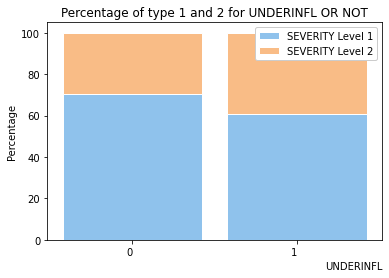

In [22]:
grp = all_data.groupby('SEVERITYCODE')
r = list(range(int(len(grp['UNDERINFL'].value_counts().values)/2)))
raw_data = {'greenBars': grp['UNDERINFL'].value_counts().values.tolist()[0:int(len(grp['UNDERINFL'].value_counts().values)/2)], 'orangeBars': grp['UNDERINFL'].value_counts().values.tolist()[int(len(grp['UNDERINFL'].value_counts().values)/2):]}
df_plot = pd.DataFrame(raw_data)
totals = [i+j for i,j in zip(df_plot['greenBars'], df_plot['orangeBars'])]
greenBars = [i / j * 100 for i,j in zip(df_plot['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df_plot['orangeBars'], totals)]
barWidth = 0.85
names = all_data['UNDERINFL'].value_counts().index.tolist()
plt.bar(r, greenBars, color='#8FC2EC', edgecolor='white', width=barWidth, label = 'SEVERITY Level 1')
plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth, label = 'SEVERITY Level 2')
plt.xticks(r, names, ha="right")
plt.xlabel('UNDERINFL', horizontalalignment='right', position=(1,25))
plt.ylabel('Percentage')
plt.title('Percentage of type 1 and 2 for UNDERINFL OR NOT')
plt.legend(facecolor='white', framealpha=1)
plt.show()

### Inattention

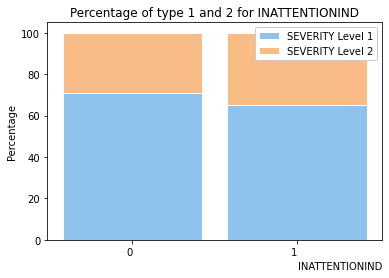

In [23]:
r = list(range(int(len(grp['INATTENTIONIND'].value_counts().values)/2)))
raw_data = {'greenBars': grp['INATTENTIONIND'].value_counts().values.tolist()[0:int(len(grp['INATTENTIONIND'].value_counts().values)/2)], 'orangeBars': grp['INATTENTIONIND'].value_counts().values.tolist()[int(len(grp['INATTENTIONIND'].value_counts().values)/2):]}
df_plot = pd.DataFrame(raw_data)
totals = [i+j for i,j in zip(df_plot['greenBars'], df_plot['orangeBars'])]
greenBars = [i / j * 100 for i,j in zip(df_plot['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df_plot['orangeBars'], totals)]
barWidth = 0.85
names = all_data['INATTENTIONIND'].value_counts().index.tolist()
plt.bar(r, greenBars, color='#8FC2EC', edgecolor='white', width=barWidth, label = 'SEVERITY Level 1')
plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth, label = 'SEVERITY Level 2')
plt.xticks(r, names, ha="right")
plt.xlabel('INATTENTIONIND', horizontalalignment='right', position=(1,25))
plt.ylabel('Percentage')
plt.title('Percentage of type 1 and 2 for INATTENTIONIND')
plt.legend(facecolor='white', framealpha=1)
plt.show()

### Speeding

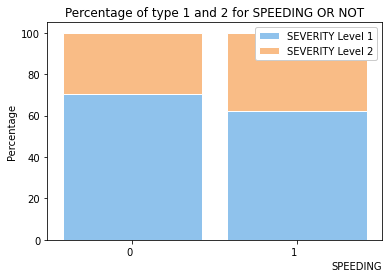

In [24]:
r = list(range(int(len(grp['SPEEDING'].value_counts().values)/2)))
raw_data = {'greenBars': grp['SPEEDING'].value_counts().values.tolist()[0:int(len(grp['SPEEDING'].value_counts().values)/2)], 'orangeBars': grp['SPEEDING'].value_counts().values.tolist()[int(len(grp['SPEEDING'].value_counts().values)/2):]}
df_plot = pd.DataFrame(raw_data)
totals = [i+j for i,j in zip(df_plot['greenBars'], df_plot['orangeBars'])]
greenBars = [i / j * 100 for i,j in zip(df_plot['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df_plot['orangeBars'], totals)]
barWidth = 0.85
names = all_data['SPEEDING'].value_counts().index.tolist()
plt.bar(r, greenBars, color='#8FC2EC', edgecolor='white', width=barWidth, label = 'SEVERITY Level 1')
plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth, label = 'SEVERITY Level 2')
plt.xticks(r, names, ha="right")
plt.xlabel('SPEEDING', horizontalalignment='right', position=(1,25))
plt.ylabel('Percentage')
plt.title('Percentage of type 1 and 2 for SPEEDING OR NOT')
plt.legend(facecolor='white', framealpha=1)
plt.show()

From this part we can see that in cases where drivers are under influence, speeding, or distracted driving, the likelihood of accidents being level 2 increases roughly 10%. 

### Pedestrian right of way was granted

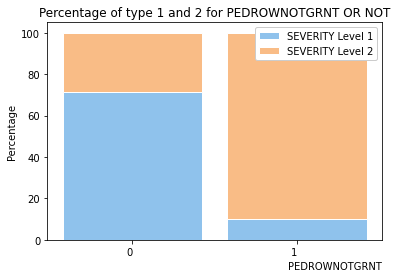

In [25]:
r = list(range(int(len(grp['PEDROWNOTGRNT'].value_counts().values)/2)))
raw_data = {'greenBars': grp['PEDROWNOTGRNT'].value_counts().values.tolist()[0:int(len(grp['PEDROWNOTGRNT'].value_counts().values)/2)], 'orangeBars': grp['PEDROWNOTGRNT'].value_counts().values.tolist()[int(len(grp['PEDROWNOTGRNT'].value_counts().values)/2):]}
df_plot = pd.DataFrame(raw_data)
totals = [i+j for i,j in zip(df_plot['greenBars'], df_plot['orangeBars'])]
greenBars = [i / j * 100 for i,j in zip(df_plot['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df_plot['orangeBars'], totals)]
barWidth = 0.85
names = all_data['PEDROWNOTGRNT'].value_counts().index.tolist()
plt.bar(r, greenBars, color='#8FC2EC', edgecolor='white', width=barWidth, label = 'SEVERITY Level 1')
plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth, label = 'SEVERITY Level 2')
plt.xticks(r, names, ha="right")
plt.xlabel('PEDROWNOTGRNT', horizontalalignment='right', position=(1,25))
plt.ylabel('Percentage')
plt.title('Percentage of type 1 and 2 for PEDROWNOTGRNT OR NOT')
plt.legend(facecolor='white', framealpha=1)
plt.show()

In cases where pedestrian right of way was granted, the possibility of it being level 2 accident is very high. 

### Hit Parked Car

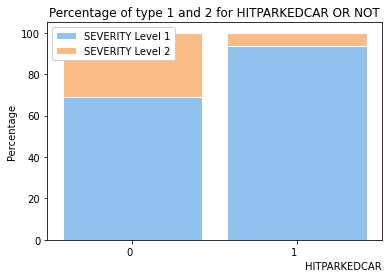

In [26]:
r = list(range(int(len(grp['HITPARKEDCAR'].value_counts().values)/2)))
raw_data = {'greenBars': grp['HITPARKEDCAR'].value_counts().values.tolist()[0:int(len(grp['HITPARKEDCAR'].value_counts().values)/2)], 'orangeBars': grp['HITPARKEDCAR'].value_counts().values.tolist()[int(len(grp['HITPARKEDCAR'].value_counts().values)/2):]}
df_plot = pd.DataFrame(raw_data)
totals = [i+j for i,j in zip(df_plot['greenBars'], df_plot['orangeBars'])]
greenBars = [i / j * 100 for i,j in zip(df_plot['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df_plot['orangeBars'], totals)]
barWidth = 0.85
names = all_data['HITPARKEDCAR'].value_counts().index.tolist()
plt.bar(r, greenBars, color='#8FC2EC', edgecolor='white', width=barWidth, label = 'SEVERITY Level 1')
plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth, label = 'SEVERITY Level 2')
plt.xticks(r, names, ha="right")
plt.xlabel('HITPARKEDCAR', horizontalalignment='right', position=(1,25))
plt.ylabel('Percentage')
plt.title('Percentage of type 1 and 2 for HITPARKEDCAR OR NOT')
plt.legend(facecolor='white', framealpha=1)
plt.show()

Here it shows that if an accident involves in hitting a parked car, it's usually a level 1 accident. 

### Correlation Between Numerical Variables

In [27]:
all_data_num = all_data[['SEVERITYCODE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT']]
all_data_num.corr()

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT
SEVERITYCODE,1.000000,0.130949,0.246338,0.214218,-0.054686
PERSONCOUNT,0.130949,1.000000,-0.023464,-0.038809,0.380523
PEDCOUNT,0.246338,-0.023464,1.000000,-0.016920,-0.261285
PEDCYLCOUNT,0.214218,-0.038809,-0.016920,1.000000,-0.253773
VEHCOUNT,-0.054686,0.380523,-0.261285,-0.253773,1.000000


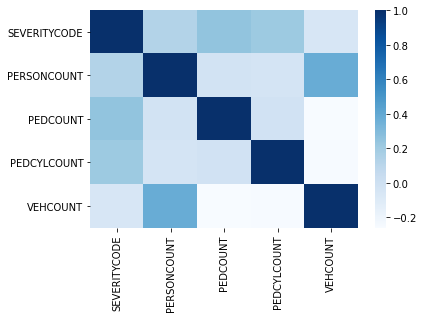

In [28]:
sns.heatmap(all_data_num.corr(), cmap="Blues")

Here we notice that the number of vehicle involved in an accident is positively associated with the number of people involved, which makes sense, but other than than, there is not much useful information here. 

### Time Series Analysis

In [29]:
all_data['INCDTTM'] = pd.to_datetime(df['INCDTTM'])
time = df[['INCDTTM', 'SEVERITYCODE']]
time['Year_Month'] = all_data['INCDTTM'].dt.strftime('%Y/%m')
time.head()

,INCDTTM,SEVERITYCODE,Year_Month
0,3/27/2013 2:54:00 PM,2,2013/03
1,12/20/2006 6:55:00 PM,1,2006/12
2,11/18/2004 10:20:00 AM,1,2004/11
3,3/29/2013 9:26:00 AM,1,2013/03
4,1/28/2004 8:04:00 AM,2,2004/01


In [30]:
time_sorted = time.set_index('Year_Month').sort_index()
time_sorted.reset_index(inplace = True)

In [31]:
time_sorted

,Year_Month,INCDTTM,SEVERITYCODE
0,2004/01,1/26/2004 11:16:00 AM,2
1,2004/01,1/8/2004,1
2,2004/01,1/22/2004 6:10:00 AM,1
3,2004/01,1/13/2004 8:30:00 AM,1
4,2004/01,1/30/2004 1:40:00 PM,1
...,...,...,...
194668,2020/05,5/15/2020,1
194669,2020/05,5/9/2020,1
194670,2020/05,5/12/2020,1
194671,2020/05,5/9/2020,1


### Monthly Road Accident Count Over Time

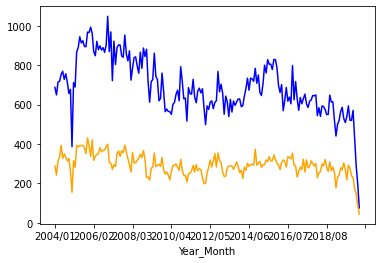

In [32]:
cd_1 = time_sorted[time_sorted['SEVERITYCODE'] == 1]
grp_1 = cd_1.groupby(['Year_Month'])
grp_1.size().plot(kind = 'line', color = 'blue')
cd_2 = time_sorted[time_sorted['SEVERITYCODE'] == 2]
grp_2 = cd_2.groupby(['Year_Month'])
grp_2.size().plot(kind = 'line', color = 'orange')
plt.show()

We can see that From 2004 to 2020, the count of car accidents have dropped significantly. Note that there is a big jump around November 2004 and a big drop starting February 2019. 

### Road Accidents Count VS Day of Week

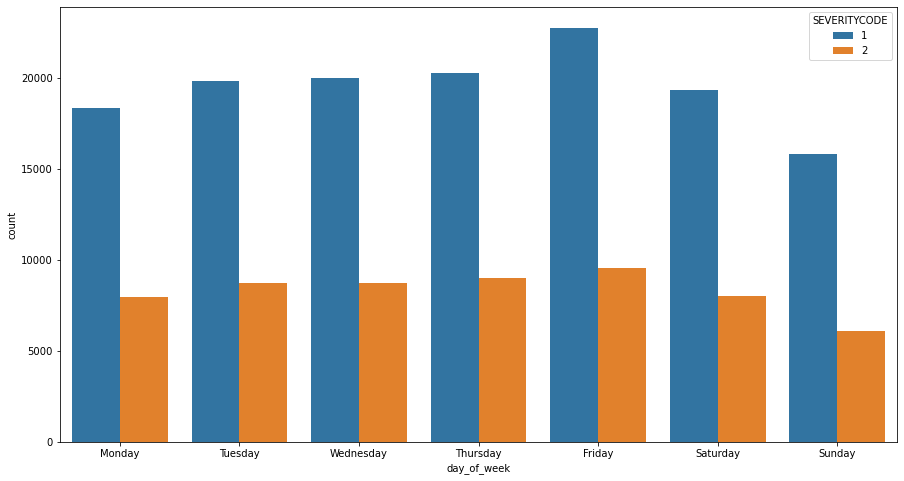

In [33]:
time['day_of_week'] = all_data['INCDTTM'].dt.day_name()
plt.figure(figsize = (15, 8))
sns.countplot(x="day_of_week", hue="SEVERITYCODE", data=time, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

### Road Accidents Count VS Months

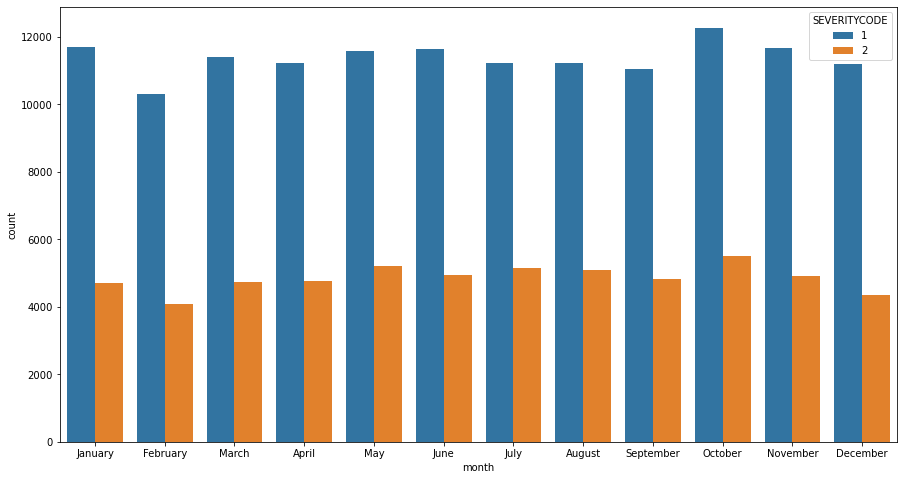

In [34]:
time['month'] = all_data['INCDTTM'].dt.month_name()
plt.figure(figsize = (15, 8))
sns.countplot(x="month", hue="SEVERITYCODE", data=time, order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

We can see from the time series analysis that Friday has the highest accident count and Sunday has the lowest in a week. 
When we look at the months, we notice that October has the highest accident count and February has the lowest. 

## Geographical Analysis

In [35]:
seattle = gpd.read_file(r'Street_Network_Database__SND_.shp')
df_geo = all_data[['X', 'Y', 'SEVERITYCODE']]
crs = {'init': 'epsg:4326'}
geometry = [Point(xy) for xy in zip(df_geo['X'], df_geo['Y'])]
df_geo = gpd.GeoDataFrame(df_geo, crs = crs, geometry = geometry)

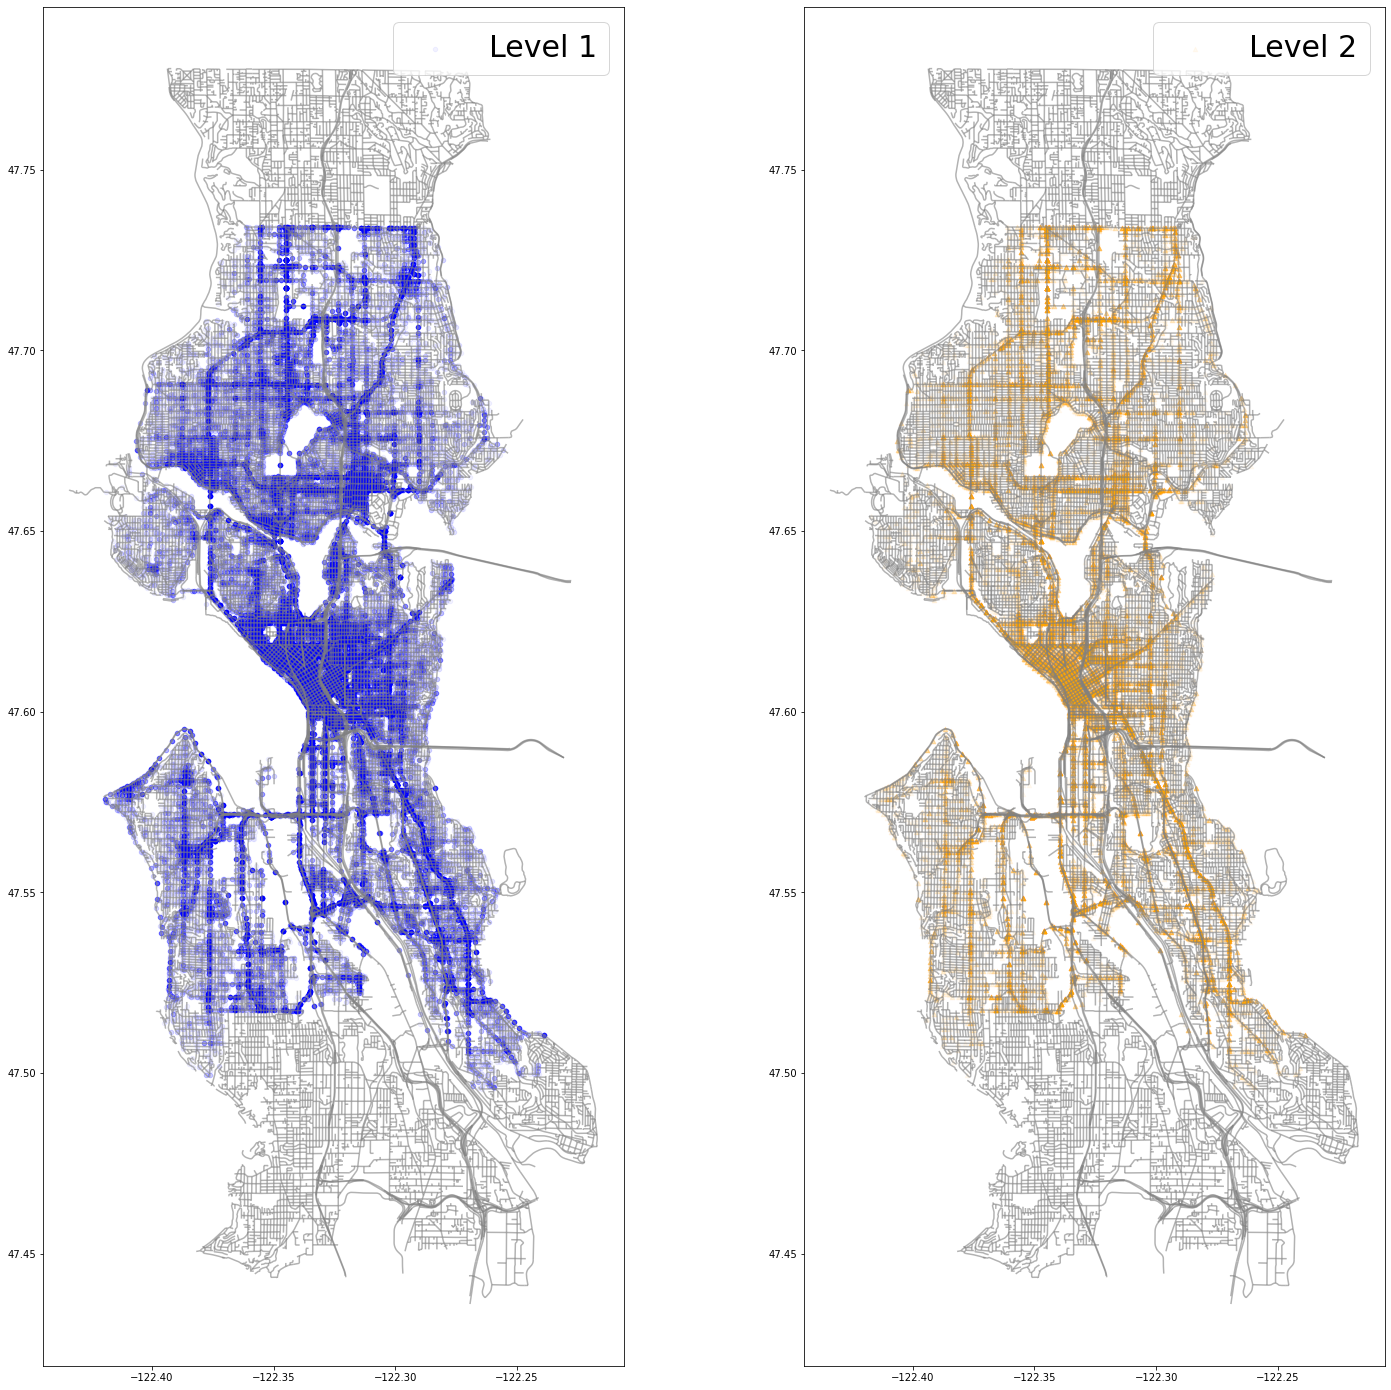

In [36]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (25, 25))
seattle.plot(ax = ax[0], alpha = 0.6, color = 'grey')
df_geo[df_geo['SEVERITYCODE'] == 1].plot(ax = ax[0], markersize = 20, color = 'blue', marker = 'o', label = 'Level 1', alpha = 0.05)
ax[0].legend(prop={'size': 30})
seattle.plot(ax = ax[1], alpha = 0.6, color = 'grey')
df_geo[df_geo['SEVERITYCODE'] == 2].plot(ax = ax[1], markersize = 20, color = 'orange', marker = '^', label = 'Level 2', alpha = 0.05)
ax[1].legend(prop={'size': 30})

Here we see that there is no obvious distinction in terms of the location of where accidents happen. Both level 1 and level 2 accidents seem to distribute in similar areas. 

## 5. Feature Selection

In this part, we need to decide what variables to keep and what variables to drop for further analysis. First we will look at information about the missing values again, which will help us decide what variables to keep or drop. 

In [37]:
total_ = all_data.isnull().sum().sort_values(ascending=False)
percent_ = (all_data.isnull().sum()/all_data.isnull().count()).sort_values(ascending=False)
missing_data_ = pd.concat([total_, percent_], axis=1, keys=['Total', 'Percent'])
missing_data_.head(20)

,Total,Percent
EXCEPTRSNDESC,189035,0.971039
INTKEY,129603,0.665747
EXCEPTRSNCODE,109862,0.564341
SDOTCOLNUM,79737,0.409595
JUNCTIONTYPE,6329,0.032511
X,5334,0.027400
Y,5334,0.027400
LIGHTCOND,5170,0.026557
WEATHER,5081,0.026100
ROADCOND,5012,0.025746


For this project, we will drop the following features due to given reasons:
1. OBJECTID, INCKEY, COLDETKEY, REPORTNO, INTKEY,SEGLANEKEY, CROSSWALKKEY, X, Y: unique identifiers for each for reported road accidents and location where accidents happened, which doesn't help us predict the severity of car accidents. 
2. STATUS, LOCATION, EXCEPTRSNCODE, EXCEPTRSNDESC, SEVERITYDESC, SDOT_COLDESC, ST_COLDESC: text variables that will not be used for this particular project. 
3. SDOT_COLCODE, SDOTCOLNUM, ST_COLCODE: too many levels of values and missing values. 
4. INCDATE, INCDTTM: Time series data that will not be used for this particular project. 
5. SEVERITYCODE.1: contains the same values as variable SEVERITYCODE

Therefore, for baseline model performance and reasons mentioned above, we will use the following variables to train the models. 

In [38]:
features = ['SEVERITYCODE','PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 
            'JUNCTIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'ADDRTYPE', 'COLLISIONTYPE',
            'PEDROWNOTGRNT', 'SPEEDING','HITPARKEDCAR', 'INATTENTIONIND', 'UNDERINFL']
all_data = all_data[features]

## 6. Data Preprocessing for Machine Learning

### Data Cleaning

In this part, we need to deal with the remaining missing values.

In [39]:
total_ = all_data.isnull().sum().sort_values(ascending=False)
percent_ = (all_data.isnull().sum()/all_data.isnull().count()).sort_values(ascending=False)
missing_data_ = pd.concat([total_, percent_], axis=1, keys=['Total', 'Percent'])
missing_data_

,Total,Percent
JUNCTIONTYPE,6329,0.032511
LIGHTCOND,5170,0.026557
WEATHER,5081,0.026100
ROADCOND,5012,0.025746
COLLISIONTYPE,4904,0.025191
ADDRTYPE,1926,0.009894
UNDERINFL,0,0.000000
INATTENTIONIND,0,0.000000
HITPARKEDCAR,0,0.000000
SPEEDING,0,0.000000


Since the missing values only take up 3% of the data, we can drop these rows without sacrificing too much of the model performance. 

In [40]:
all_data.dropna(inplace = True)
all_data.isnull().any()

SEVERITYCODE      False
PERSONCOUNT       False
PEDCOUNT          False
PEDCYLCOUNT       False
VEHCOUNT          False
JUNCTIONTYPE      False
WEATHER           False
ROADCOND          False
LIGHTCOND         False
ADDRTYPE          False
COLLISIONTYPE     False
PEDROWNOTGRNT     False
SPEEDING          False
HITPARKEDCAR      False
INATTENTIONIND    False
UNDERINFL         False
dtype: bool

### Transform Categorical Variables (One-Hot Coding)

In [41]:
all_data_cat = all_data[['ADDRTYPE', 'COLLISIONTYPE', 'JUNCTIONTYPE', 'LIGHTCOND', 'WEATHER', 'ROADCOND']]
dummies = pd.get_dummies(all_data_cat)
all_data = pd.concat([all_data, dummies], axis=1)
all_data.drop(['ADDRTYPE', 'COLLISIONTYPE', 'JUNCTIONTYPE', 'LIGHTCOND', 'WEATHER', 'ROADCOND'], axis = 1, inplace = True)

In [42]:
all_data.columns.values

array(['SEVERITYCODE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT',
       'VEHCOUNT', 'PEDROWNOTGRNT', 'SPEEDING', 'HITPARKEDCAR',
       'INATTENTIONIND', 'UNDERINFL', 'ADDRTYPE_Alley', 'ADDRTYPE_Block',
       'ADDRTYPE_Intersection', 'COLLISIONTYPE_Angles',
       'COLLISIONTYPE_Cycles', 'COLLISIONTYPE_Head On',
       'COLLISIONTYPE_Left Turn', 'COLLISIONTYPE_Other',
       'COLLISIONTYPE_Parked Car', 'COLLISIONTYPE_Pedestrian',
       'COLLISIONTYPE_Rear Ended', 'COLLISIONTYPE_Right Turn',
       'COLLISIONTYPE_Sideswipe',
       'JUNCTIONTYPE_At Intersection (but not related to intersection)',
       'JUNCTIONTYPE_At Intersection (intersection related)',
       'JUNCTIONTYPE_Driveway Junction',
       'JUNCTIONTYPE_Mid-Block (but intersection related)',
       'JUNCTIONTYPE_Mid-Block (not related to intersection)',
       'JUNCTIONTYPE_Ramp Junction', 'JUNCTIONTYPE_Unknown',
       'LIGHTCOND_Dark - No Street Lights',
       'LIGHTCOND_Dark - Street Lights Off',
       'LIGHTCOND_D

### Standardize Variables

In [43]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
all_data[['PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT']] = scale.fit_transform(all_data[['PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT']])

### Split Train and Test Dataset

In [44]:
from sklearn.model_selection import train_test_split
X = all_data.loc[:, all_data.columns != 'SEVERITYCODE'].values.astype(float)
y = all_data['SEVERITYCODE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [45]:
print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in validation set:", X_test.shape[0])

print('\n')
print('No. of Level 1 and Level 2 accidents in the training set:')
print(y_train.value_counts())

print('\n')
print('No. of Level 1 and Level 2 accidents in the test set:')
print(y_test.value_counts())

No. of samples in training set:  146316
No. of samples in validation set: 36579


No. of Level 1 and Level 2 accidents in the training set:
1    100953
2     45363
Name: SEVERITYCODE, dtype: int64


No. of Level 1 and Level 2 accidents in the test set:
1    25317
2    11262
Name: SEVERITYCODE, dtype: int64


## 7. Baseline Model Building
In this part, we will start building machine learning models for this project. For the purpose of this project, I will feed the training dataset to the following machine learning algorithms: 
1. Logistic Regression
2. Decision Tree Classifier
3. K-Nearest Neighbors
4. Random Forest
5. XGBoost

For this particular project, I will not use SVM simply because the dataset is too large for training the model. I will first build these models using the default parameters and evaluate the baseline performance by looking at evluation metrics. We will pick 3 out of all 5 models based on performance scores and then we will fine-tune the parameters using GridSearchCV to further improve the performance of these 3 models. 

In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from yellowbrick.classifier import ROCAUC
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### Logistic Regression

In [47]:
lr = LogisticRegression(random_state = 0)
lr.fit(X_train, y_train)
y_predict_lr = lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_predict_lr)
f1_lr = f1_score(y_test, y_predict_lr, average='weighted')
print(classification_report(y_test, y_predict_lr))
print("Test set Accuracy: ", accuracy_lr)
print("F-1 score: ", f1_lr)

              precision    recall  f1-score   support

           1       0.75      0.95      0.84     25317
           2       0.72      0.30      0.42     11262

    accuracy                           0.75     36579
   macro avg       0.74      0.62      0.63     36579
weighted avg       0.74      0.75      0.71     36579

Test set Accuracy:  0.7484895705186035
F-1 score:  0.7108511080883515


### Decision Tree

In [48]:
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(X_train, y_train)
y_predict_dt = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_predict_dt)
f1_dt = f1_score(y_test, y_predict_dt, average='weighted')
print(classification_report(y_test, y_predict_dt))
print("Test set Accuracy: ", accuracy_dt)
print("F-1 score: ", f1_dt)

              precision    recall  f1-score   support

           1       0.76      0.92      0.83     25317
           2       0.65      0.34      0.44     11262

    accuracy                           0.74     36579
   macro avg       0.70      0.63      0.64     36579
weighted avg       0.72      0.74      0.71     36579

Test set Accuracy:  0.7403974958309413
F-1 score:  0.711847836436066


### K-Nearst Neighbors (KNN)

In [49]:
knn = KNeighborsClassifier(n_jobs = -1)
knn.fit(X_train, y_train)
y_predict_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_predict_knn)
f1_knn = f1_score(y_test, y_predict_knn, average='weighted')
print(classification_report(y_test, y_predict_knn))
print("Test set Accuracy: ", accuracy_knn)
print("F-1 score: ", f1_knn)

              precision    recall  f1-score   support

           1       0.77      0.84      0.80     25317
           2       0.55      0.43      0.49     11262

    accuracy                           0.72     36579
   macro avg       0.66      0.64      0.64     36579
weighted avg       0.70      0.72      0.71     36579

Test set Accuracy:  0.7163399764892424
F-1 score:  0.7060881019617679


### XGBoost

In [50]:
xgb = XGBClassifier(random_state =0)
xgb.fit(X_train, y_train)
y_predict_xgb = xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_predict_xgb)
f1_xgb = f1_score(y_test, y_predict_xgb, average='weighted')
print(classification_report(y_test, y_predict_xgb))
print("Test set Accuracy: ", accuracy_xgb)
print("F-1 score: ", f1_xgb)

              precision    recall  f1-score   support

           1       0.76      0.93      0.84     25317
           2       0.69      0.35      0.46     11262

    accuracy                           0.75     36579
   macro avg       0.73      0.64      0.65     36579
weighted avg       0.74      0.75      0.72     36579

Test set Accuracy:  0.751578774706799
F-1 score:  0.7224025725188675


### Random Forest

In [51]:
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train, y_train)
y_predict_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_predict_rf)
f1_rf = f1_score(y_test, y_predict_rf, average='weighted')
print(classification_report(y_test, y_predict_rf))
print("Test set Accuracy: ", accuracy_rf)
print("F-1 score: ", f1_rf)

              precision    recall  f1-score   support

           1       0.76      0.92      0.83     25317
           2       0.66      0.36      0.46     11262

    accuracy                           0.74     36579
   macro avg       0.71      0.64      0.65     36579
weighted avg       0.73      0.74      0.72     36579

Test set Accuracy:  0.7448262664370268
F-1 score:  0.7192156511463598


### Baseline Performance Summary

In [52]:
result = {
  "Algorithm": ['Logistic Regression', 'Decision Tree', 'KNN', 'XGBoost', 'Random Forest'],
  "Accuracy": [accuracy_lr, accuracy_dt, accuracy_knn, accuracy_xgb, accuracy_rf],
  "F1-score": [f1_lr, f1_dt, f1_knn, f1_xgb, f1_rf],
}
pd.DataFrame(result).sort_values('Accuracy', ascending = False)

,Algorithm,Accuracy,F1-score
3,XGBoost,0.751579,0.722403
0,Logistic Regression,0.748490,0.710851
4,Random Forest,0.744826,0.719216
1,Decision Tree,0.740397,0.711848
2,KNN,0.716340,0.706088


Here we can see that, for baseline performance, **XGBoost**, **Logistic Regression** and **Random Forest** models have the highest performance scores. In the next step, we will fine tune these models. 

## 8. Feature Engineering

We we were dealing with missing values, we replaced the NaN in variables INATTENTIONIND, UNDERINFL, SPEEDING, PEDROWNOTGRNT with value 0. However, those NaN values may contain true missing values. Therefore, this time we will not include these variables and see if it will improve the baseline performance before we start tuning the hyperparameters of models. 

In [54]:
data_fe = all_data.drop(columns = ['INATTENTIONIND', 'UNDERINFL', 'SPEEDING', 'PEDROWNOTGRNT'])
data_fe

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,HITPARKEDCAR,ADDRTYPE_Alley,ADDRTYPE_Block,ADDRTYPE_Intersection,COLLISIONTYPE_Angles,...,WEATHER_Unknown,ROADCOND_Dry,ROADCOND_Ice,ROADCOND_Oil,ROADCOND_Other,ROADCOND_Sand/Mud/Dirt,ROADCOND_Snow/Slush,ROADCOND_Standing Water,ROADCOND_Unknown,ROADCOND_Wet
0,2,-0.347411,-0.192133,-0.174010,0.049741,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
1,1,-0.347411,-0.192133,-0.174010,0.049741,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,1.111477,-0.192133,-0.174010,1.825199,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,0.382033,-0.192133,-0.174010,1.825199,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,2,-0.347411,-0.192133,-0.174010,0.049741,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,2,0.382033,-0.192133,-0.174010,0.049741,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
194669,1,-0.347411,-0.192133,-0.174010,0.049741,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
194670,2,0.382033,-0.192133,-0.174010,0.049741,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
194671,2,-0.347411,-0.192133,5.659124,-1.725717,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [55]:
X = data_fe.loc[:, data_fe.columns != 'SEVERITYCODE'].values.astype(float)
y = data_fe['SEVERITYCODE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [56]:
print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in validation set:", X_test.shape[0])

print('\n')
print('No. of Level 1 and Level 2 accidents in the training set:')
print(y_train.value_counts())

print('\n')
print('No. of Level 1 and Level 2 accidents in the test set:')
print(y_test.value_counts())

No. of samples in training set:  146316
No. of samples in validation set: 36579


No. of Level 1 and Level 2 accidents in the training set:
1    100953
2     45363
Name: SEVERITYCODE, dtype: int64


No. of Level 1 and Level 2 accidents in the test set:
1    25317
2    11262
Name: SEVERITYCODE, dtype: int64


### Logistic Regression

              precision    recall  f1-score   support

           1       0.75      0.95      0.84     25317
           2       0.73      0.29      0.41     11262

    accuracy                           0.75     36579
   macro avg       0.74      0.62      0.63     36579
weighted avg       0.75      0.75      0.71     36579

Test set Accuracy:  0.7485989228792477
F-1 score:  0.7084892389928193
[[24152  1165]
 [ 8031  3231]]


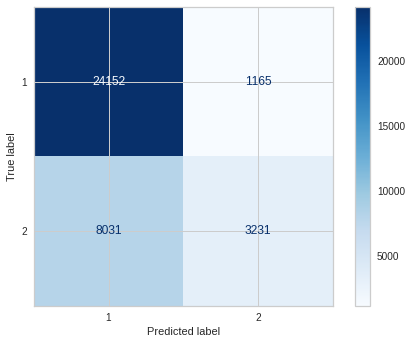

In [57]:
lr = LogisticRegression(random_state = 0)
lr.fit(X_train, y_train)
y_predict_lr = lr.predict(X_test)
disp_lr = plot_confusion_matrix(lr, X_test, y_test,cmap=plt.cm.Blues)
accuracy_lr_fe = accuracy_score(y_test, y_predict_lr)
f1_lr_fe = f1_score(y_test, y_predict_lr, average='weighted')
print(classification_report(y_test, y_predict_lr))
print("Test set Accuracy: ", accuracy_lr_fe)
print("F-1 score: ", f1_lr_fe)
print(disp_lr.confusion_matrix)

### Decision Tree

              precision    recall  f1-score   support

           1       0.76      0.93      0.83     25317
           2       0.68      0.33      0.44     11262

    accuracy                           0.75     36579
   macro avg       0.72      0.63      0.64     36579
weighted avg       0.73      0.75      0.71     36579

Test set Accuracy:  0.7450449711583149
F-1 score:  0.7139363705758602
[[23554  1763]
 [ 7563  3699]]


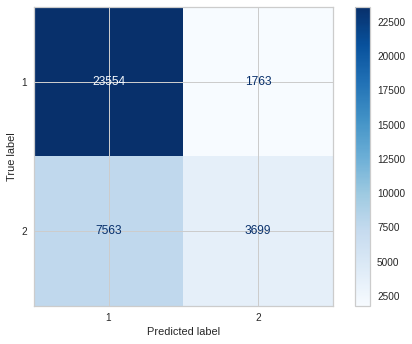

In [58]:
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(X_train, y_train)
y_predict_dt = dt.predict(X_test)
disp_dt = plot_confusion_matrix(dt, X_test, y_test,cmap=plt.cm.Blues)
accuracy_dt_fe = accuracy_score(y_test, y_predict_dt)
f1_dt_fe = f1_score(y_test, y_predict_dt, average='weighted')
print(classification_report(y_test, y_predict_dt))
print("Test set Accuracy: ", accuracy_dt_fe)
print("F-1 score: ", f1_dt_fe)
print(disp_dt.confusion_matrix)

### KNN

              precision    recall  f1-score   support

           1       0.77      0.86      0.81     25317
           2       0.56      0.42      0.48     11262

    accuracy                           0.72     36579
   macro avg       0.66      0.64      0.64     36579
weighted avg       0.70      0.72      0.71     36579

Test set Accuracy:  0.7202766614724295
F-1 score:  0.7072302675970717
[[23554  1763]
 [ 7563  3699]]


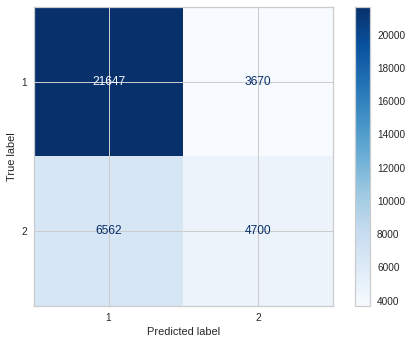

In [59]:
knn = KNeighborsClassifier(n_jobs = -1)
knn.fit(X_train, y_train)
y_predict_knn = knn.predict(X_test)
disp_knn = plot_confusion_matrix(knn, X_test, y_test,cmap=plt.cm.Blues)
accuracy_knn_fe = accuracy_score(y_test, y_predict_knn)
f1_knn_fe = f1_score(y_test, y_predict_knn, average='weighted')
print(classification_report(y_test, y_predict_knn))
print("Test set Accuracy: ", accuracy_knn_fe)
print("F-1 score: ", f1_knn_fe)
print(disp_dt.confusion_matrix)

### XGBoost

              precision    recall  f1-score   support

           1       0.76      0.95      0.84     25317
           2       0.72      0.31      0.44     11262

    accuracy                           0.75     36579
   macro avg       0.74      0.63      0.64     36579
weighted avg       0.74      0.75      0.72     36579

Test set Accuracy:  0.7506766177314853
F-1 score:  0.7157132388601312
[[23927  1390]
 [ 7730  3532]]


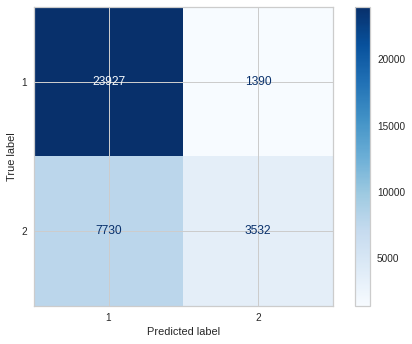

In [60]:
xgb = XGBClassifier(random_state =0)
xgb.fit(X_train, y_train)
y_predict_xgb = xgb.predict(X_test)
disp_xgb = plot_confusion_matrix(xgb, X_test, y_test,cmap=plt.cm.Blues)
accuracy_xgb_fe = accuracy_score(y_test, y_predict_xgb)
f1_xgb_fe = f1_score(y_test, y_predict_xgb, average='weighted')
print(classification_report(y_test, y_predict_xgb))
print("Test set Accuracy: ", accuracy_xgb_fe)
print("F-1 score: ", f1_xgb_fe)
print(disp_xgb.confusion_matrix)

### Random Forest

              precision    recall  f1-score   support

           1       0.76      0.92      0.83     25317
           2       0.67      0.34      0.45     11262

    accuracy                           0.75     36579
   macro avg       0.71      0.63      0.64     36579
weighted avg       0.73      0.75      0.72     36579

Test set Accuracy:  0.7448262664370268
F-1 score:  0.7192156511463598
[[23388  1929]
 [ 7381  3881]]


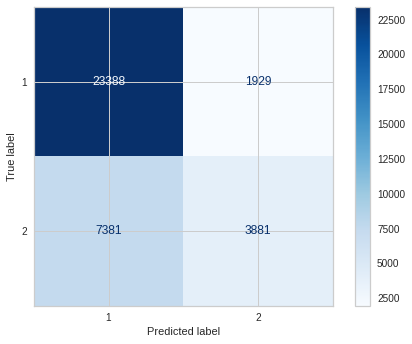

In [61]:
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train, y_train)
y_predict_rf = rf.predict(X_test)
disp_rf = plot_confusion_matrix(rf, X_test, y_test,cmap=plt.cm.Blues)
accuracy_rf_fe = accuracy_score(y_test, y_predict_rf)
f1_rf_fe = f1_score(y_test, y_predict_rf, average='weighted')
print(classification_report(y_test, y_predict_rf))
print("Test set Accuracy: ", accuracy_rf)
print("F-1 score: ", f1_rf)
print(disp_rf.confusion_matrix)

### Result after Feature Engineering

In [62]:
result2 = {
  "Algorithm": ['Logistic Regression', 'Decision Tree', 'KNN', 'XGBoost', 'Random Forest'],
  "Accuracy": [accuracy_lr, accuracy_dt, accuracy_knn, accuracy_xgb, accuracy_rf],
  "Accuracy_feature": [accuracy_lr_fe, accuracy_dt_fe, accuracy_knn_fe, accuracy_xgb_fe, accuracy_rf_fe],
  "F1-score": [f1_lr, f1_dt, f1_knn, f1_xgb, f1_rf],
  "F1-score_feature": [f1_lr_fe, f1_dt_fe, f1_knn_fe, f1_xgb_fe, f1_rf_fe],

}
pd.DataFrame(result2).sort_values('Accuracy_feature', ascending = False)

,Algorithm,Accuracy,Accuracy_feature,F1-score,F1-score_feature
3,XGBoost,0.751579,0.750677,0.722403,0.715713
0,Logistic Regression,0.748490,0.748599,0.710851,0.708489
4,Random Forest,0.744826,0.745482,0.719216,0.717212
1,Decision Tree,0.740397,0.745045,0.711848,0.713936
2,KNN,0.716340,0.720277,0.706088,0.707230


As we can see from the table, the increase in performance is not significant. Therefore we will still keep variables INATTENTIONIND, UNDERINFL, SPEEDING, PEDROWNOTGRNT in the following hyperparameter tuning step. 

## 9. Hyperparameter Tuning

At this part, we are going to tune the models to improve their performances. The method that we are going to use is GridSearchCV. We will pass in a series of parameters and let it return the model parameters with the best accuracy score. We will then use the provided parameters to train the model again and return its performance report and ROC/AUC plots. 

### Logistic Regression Tuning

In [53]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 

In [54]:
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [64]:
X = all_data.loc[:, all_data.columns != 'SEVERITYCODE'].values.astype(float)
y = all_data['SEVERITYCODE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [55]:
lr_tuned = LogisticRegression(random_state = 0)
param_grid = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}

clf_lr = GridSearchCV(lr_tuned, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1, scoring='accuracy')
best_clf_lr = clf_lr.fit(X_train,y_train)
clf_performance(best_clf_lr,'Logistic Regression')

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  3.9min finished


Logistic Regression
Best Score: 0.7498086374325845
Best Parameters: {'C': 0.004832930238571752, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}


**Evaluation**

              precision    recall  f1-score   support

           1       0.75      0.95      0.84     25317
           2       0.74      0.29      0.41     11262

    accuracy                           0.75     36579
   macro avg       0.74      0.62      0.63     36579
weighted avg       0.75      0.75      0.71     36579

Test set Accuracy:  0.7493097132234342
[[24172  1145]
 [ 8025  3237]]


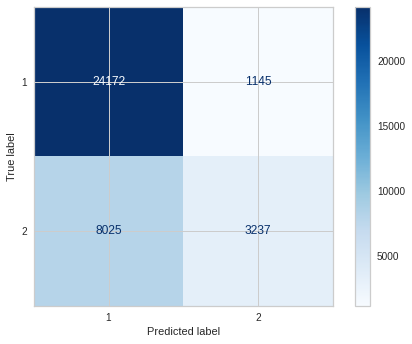

In [50]:
lr_tuned = LogisticRegression(C=0.012742749857031334, max_iter=2000, penalty='l1', solver='liblinear', random_state = 0)
lr_tuned.fit(X_train, y_train)
y_predict_lr = lr_tuned.predict(X_test)
disp_lr = plot_confusion_matrix(lr_tuned, X_test, y_test,cmap=plt.cm.Blues)
accuracy_lr_tuned = accuracy_score(y_test, y_predict_lr)
f1_lr_tuned = f1_score(y_test, y_predict_lr, average='weighted')
print(classification_report(y_test, y_predict_lr))
print("Test set Accuracy: ", accuracy_score(y_test, y_predict_lr))
print(disp_lr.confusion_matrix)

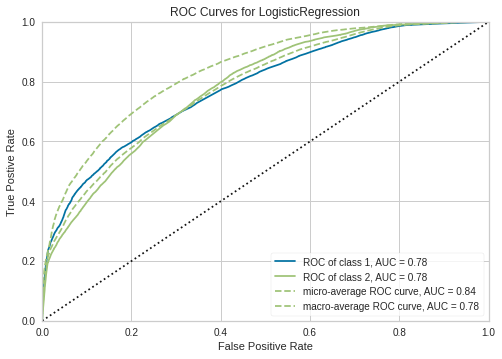

In [200]:
visualizer_lr = ROCAUC(lr_tuned)
visualizer_lr.fit(X_train, y_train)
visualizer_lr.score(X_test, y_test)
g_lr = visualizer_lr.poof()

### Decision Tree Tuning

In [202]:
dt_tuned = DecisionTreeClassifier(random_state = 0)
param_grid = {'criterion' : ['gini', 'entropy'],
              'max_depth' : [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]}

clf_dt = GridSearchCV(dt_tuned, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1, scoring='accuracy')
best_clf_dt = clf_dt.fit(X_train,y_train)
clf_performance(best_clf_dt,'Decision Tree')

Fitting 5 folds for each of 22 candidates, totalling 110 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:   33.7s finished


Decision Tree
Best Score: 0.7498242623794342
Best Parameters: {'criterion': 'entropy', 'max_depth': 9}


**Evaluation**

              precision    recall  f1-score   support

           1       0.75      0.96      0.84     25317
           2       0.77      0.27      0.40     11262

    accuracy                           0.75     36579
   macro avg       0.76      0.62      0.62     36579
weighted avg       0.75      0.75      0.71     36579

Test set Accuracy:  0.7506766177314853
[[24375   942]
 [ 8178  3084]]


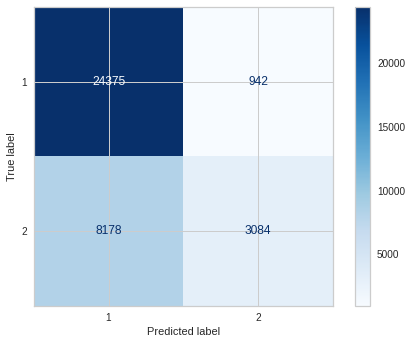

In [65]:
dt_tuned = DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state = 0)
dt_tuned.fit(X_train, y_train)
y_predict_dt = dt_tuned.predict(X_test)
disp_dt_tuned = plot_confusion_matrix(dt_tuned, X_test, y_test,cmap=plt.cm.Blues)
accuracy_dt_tuned = accuracy_score(y_test, y_predict_dt)
f1_dt_tuned = f1_score(y_test, y_predict_dt, average='weighted')
print(classification_report(y_test, y_predict_dt))
print("Test set Accuracy: ", accuracy_score(y_test, y_predict_dt))
print(disp_dt_tuned.confusion_matrix)

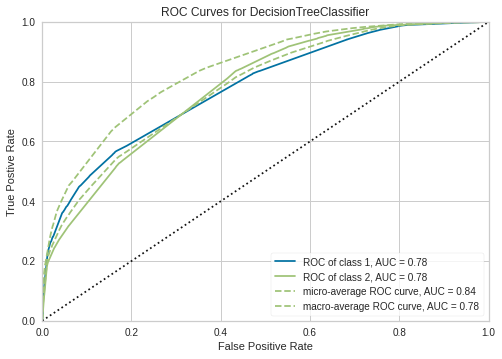

In [204]:
visualizer_dt = ROCAUC(dt_tuned)
visualizer_dt.fit(X_train, y_train)  
visualizer_dt.score(X_test, y_test)  
g_dt = visualizer_dt.poof()  

### Random Forest Tuning

In [206]:
rf_tuned = RandomForestClassifier(random_state = 0)
param_grid =  {'n_estimators': [400,450,500,550],
               'criterion':['gini','entropy']}
                                  
clf_rf = GridSearchCV(rf_tuned, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit(X_train,y_train)
clf_performance(best_clf_rf,'Random Forest')

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 23.3min finished


Random Forest
Best Score: 0.7400840602510246
Best Parameters: {'criterion': 'gini', 'n_estimators': 450}


**Evaluation**

              precision    recall  f1-score   support

           1       0.76      0.92      0.83     25317
           2       0.66      0.35      0.46     11262

    accuracy                           0.74     36579
   macro avg       0.71      0.64      0.65     36579
weighted avg       0.73      0.74      0.72     36579

Test set Accuracy:  0.7444708712649334
[[23250  2067]
 [ 7280  3982]]


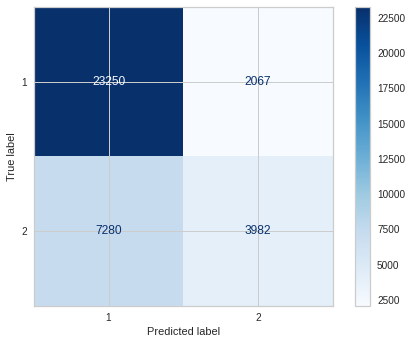

In [67]:
rf_tuned = RandomForestClassifier(random_state = 0, 
                                 criterion='gini', 
                                  n_estimators=450)
rf_tuned.fit(X_train, y_train)
y_predict_rf_tuned = rf_tuned.predict(X_test)
disp_rf_tuned = plot_confusion_matrix(rf_tuned, X_test, y_test,cmap=plt.cm.Blues)
accuracy_rf_tuned = accuracy_score(y_test, y_predict_rf_tuned)
f1_rf_tuned = f1_score(y_test, y_predict_rf_tuned, average='weighted')
print(classification_report(y_test, y_predict_rf_tuned))
print("Test set Accuracy: ", accuracy_score(y_test, y_predict_rf_tuned))
print(disp_rf_tuned.confusion_matrix)

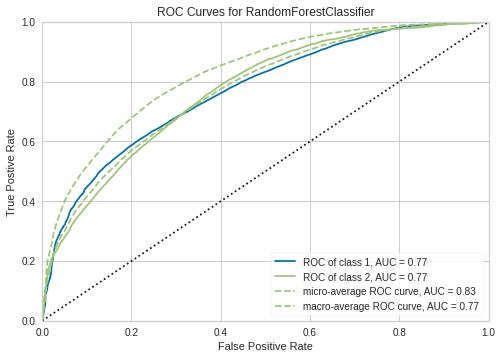

In [254]:
visualizer_rf_tuned = ROCAUC(rf_tuned)
visualizer_rf_tuned.fit(X_train, y_train)  
visualizer_rf_tuned.score(X_test, y_test)  
g_rf_tuned = visualizer_rf_tuned.poof()   

### XGBoost Tuning

In [210]:
xgb_tuned = XGBClassifier(random_state = 0)
param_grid = {
    'n_estimators': [450,500,550],
    'max_depth': [None],
    'reg_alpha': [1],
    'reg_lambda': [2, 5, 10],
    'learning_rate':[0.5],
    'gamma':[.5,1,2],
    'min_child_weight':[0.01],
    'sampling_method': ['uniform']
}
clf_xgb = GridSearchCV(xgb_tuned, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1, scoring='accuracy')
best_clf_xgb = clf_xgb.fit(X_train,y_train)
clf_performance(best_clf_xgb,'XGB')

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 40.0min
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed: 124.3min finished


XGB
Best Score: 0.7515973389304154
Best Parameters: {'gamma': 2, 'learning_rate': 0.5, 'max_depth': None, 'min_child_weight': 0.01, 'n_estimators': 450, 'reg_alpha': 1, 'reg_lambda': 10, 'sampling_method': 'uniform'}


**Evaluation**

              precision    recall  f1-score   support

           1       0.76      0.94      0.84     25317
           2       0.72      0.33      0.45     11262

    accuracy                           0.75     36579
   macro avg       0.74      0.64      0.65     36579
weighted avg       0.75      0.75      0.72     36579

Test set Accuracy:  0.7531643839361383
[[23861  1456]
 [ 7573  3689]]


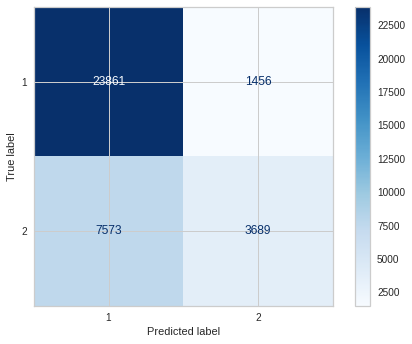

In [59]:
xgb_tuned = XGBClassifier(random_state =0, 
                          gamma=2, 
                          learning_rate=0.5, 
                          max_depth=None, 
                          min_child_weight=0.01, 
                          n_estimators=450, 
                          reg_alpha=1, 
                          reg_lambda=10, 
                          sampling_method='uniform')
xgb_tuned.fit(X_train, y_train)
y_predict_xgb_tuned = xgb_tuned.predict(X_test)
disp_xgb_tuned = plot_confusion_matrix(xgb_tuned, X_test, y_test,cmap=plt.cm.Blues)
accuracy_xgb_tuned = accuracy_score(y_test, y_predict_xgb_tuned)
f1_xgb_tuned = f1_score(y_test, y_predict_xgb_tuned, average='weighted')
print(classification_report(y_test, y_predict_xgb_tuned))
print("Test set Accuracy: ", accuracy_score(y_test, y_predict_xgb_tuned))
print(disp_xgb_tuned.confusion_matrix)

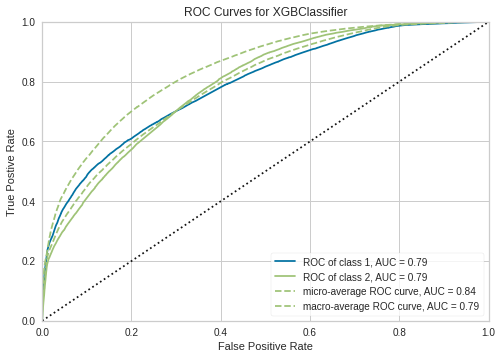

In [213]:
visualizer_xgb_tuned = ROCAUC(xgb_tuned)
visualizer_xgb_tuned.fit(X_train, y_train)  
visualizer_xgb_tuned.score(X_test, y_test)  
g_xgb_tuned = visualizer_xgb_tuned.poof()  

In [68]:
Dist = {
  "Algorithm": ['Logistic Regression', 'Decision Tree', 'KNN', 'XGBoost', 'Random Forest'],
  "Baseline accuracy": [accuracy_lr, accuracy_dt, accuracy_knn, accuracy_xgb, accuracy_rf],
  "Tuned accuracy": [accuracy_lr_tuned, accuracy_dt_tuned, 0, accuracy_xgb_tuned, accuracy_rf_tuned],
    
}
result = pd.DataFrame(Dist).sort_values(by = ['Tuned accuracy'], ascending = False, na_position="last").reset_index(drop=True)
result.loc[4, 'Tuned accuracy'] = 'NA'
result

,Algorithm,Baseline accuracy,Tuned accuracy
0,XGBoost,0.751579,0.753164
1,Decision Tree,0.740397,0.750677
2,Logistic Regression,0.748490,0.74931
3,Random Forest,0.744826,0.744471
4,KNN,0.716340,NA


## 10. Conclusion

In this project, we collected the dataset published by the Seattle Transportation Department regarding car accidents records. Then we further analyzed the data by using statistic measures and data visualization and found some interesting patterns about how each feature in the dataset may contribute to the severity of car accidents. Time series and simple geographical analysis were also performed to see the overall trend of car accidents over time as well as to find any pattern of where car accidents happen. Our goal here is to try to build a machine learning model to predict whether a car accidents is either level 1 accident or level 2 accident. We then performed data cleaning, data transformation, and data standardization to prepare for model building. We picked 5 algorthms: Logistic Regression, Decision Tree classifier, Random Forest, K-Nearest Neighbors, and XGBoost and evaluate their baseline performance. We evaluated the confusion matrix, F1 score, and ROC/AUC curve of each model and chose the best 4 models for further fine tuning. We used GridSearchCV and iterate through a list of parameters to find the one with highest score. XGBoost has the highest socre with 75.25% accuracy and 0.72 F1-score. 

## 11. Discussion

The overall model performance is okay but there is still some room for improvement. For example, we can do more feature engineering to drop some features increase the performance score on the test dataset. Due to the limitation of computing ability, SVM algorithm was not able to be performed, we will try to find a platform with higher computation capability to try more algorighms and different parameter tuning methods to improve the model performance. 